# Gerekli Kütüphanelerin Yüklenmesi

In [1]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.metrics import roc_auc_score, plot_roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import VarianceThreshold
from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif
import joblib
import csv

# Veri Setinin Yüklenmesi 

In [2]:
dataset = pd.read_csv("Covid Dataset.csv")

# Veri Seti Hakkında Bilgiler

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [4]:
dataset.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [5]:
dataset.isnull().sum() #NaN değer kontrolü

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [6]:
dataset.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

# Öznitelikler ile Değerlerin Türkçeleştirilmesi

In [7]:
dataset.rename(columns={
    "Breathing Problem": "Solunum Problemi", 
    "Fever": "Ates",
    "Dry Cough": "Kuru Oksuruk",
    "Sore throat": "Bogaz Agrisi",
    "Running Nose": "Burun Akintisi",
    "Asthma": "Astim",
    "Chronic Lung Disease": "Kronik Akciger Hastaligi",
    "Headache": "Bas Agrisi",
    "Heart Disease" :"Kalp Hastaligi",
    "Diabetes": "Diyabet",
    "Hyper Tension": "Yuksek Tansiyon",
    "Fatigue ": "Halsizlik",
    "Gastrointestinal ": "Sindirim Problemi",
    "Abroad travel": "Yurtdisi Seyahati",
    "Contact with COVID Patient": "Covidli Temasi",
    "Attended Large Gathering": "Kalabalik Ortamda Bulunma",
    "Visited Public Exposed Places": "Halka Acik Yerlerde Bulunma",
    "Family working in Public Exposed Places": "Calisan Aile Bireyleri",
    "Wearing Masks":"Maske Takma",
    "Sanitization from Market":"Steril Malzeme Kullanimi",
    "COVID-19":"COVID-19"
    }, inplace=True)
dataset.replace({"Yes":"Evet","No":"Hayir"},inplace=True)


In [8]:
dataset.head()

,Solunum Problemi,Ates,Kuru Oksuruk,Bogaz Agrisi,Burun Akintisi,Astim,Kronik Akciger Hastaligi,Bas Agrisi,Kalp Hastaligi,Diyabet,...,Halsizlik,Sindirim Problemi,Yurtdisi Seyahati,Covidli Temasi,Kalabalik Ortamda Bulunma,Halka Acik Yerlerde Bulunma,Calisan Aile Bireyleri,Maske Takma,Steril Malzeme Kullanimi,COVID-19
0,Evet,Evet,Evet,Evet,Evet,Hayir,Hayir,Hayir,Hayir,Evet,...,Evet,Evet,Hayir,Evet,Hayir,Evet,Evet,Hayir,Hayir,Evet
1,Evet,Evet,Evet,Evet,Hayir,Evet,Evet,Evet,Hayir,Hayir,...,Evet,Hayir,Hayir,Hayir,Evet,Evet,Hayir,Hayir,Hayir,Evet
2,Evet,Evet,Evet,Evet,Evet,Evet,Evet,Evet,Hayir,Evet,...,Evet,Evet,Evet,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Evet
3,Evet,Evet,Evet,Hayir,Hayir,Evet,Hayir,Hayir,Evet,Evet,...,Hayir,Hayir,Evet,Hayir,Evet,Evet,Hayir,Hayir,Hayir,Evet
4,Evet,Evet,Evet,Evet,Evet,Hayir,Evet,Evet,Evet,Evet,...,Hayir,Evet,Hayir,Evet,Hayir,Evet,Hayir,Hayir,Hayir,Evet


# Verilerin Görselleştirilmesi

Öznitelikler:  ['Solunum Problemi', 'Ates', 'Kuru Oksuruk', 'Bogaz Agrisi', 'Burun Akintisi', 'Astim', 'Kronik Akciger Hastaligi', 'Bas Agrisi', 'Kalp Hastaligi', 'Diyabet', 'Yuksek Tansiyon', 'Halsizlik', 'Sindirim Problemi', 'Yurtdisi Seyahati', 'Covidli Temasi', 'Kalabalik Ortamda Bulunma', 'Halka Acik Yerlerde Bulunma', 'Calisan Aile Bireyleri', 'Maske Takma', 'Steril Malzeme Kullanimi', 'COVID-19']
Evet Sayıları:  [1814, 1161, 1127, 1481, 2482, 2514, 2565, 2698, 2523, 2588, 2663, 2613, 2551, 2451, 2708, 2510, 2614, 2262, 0, 0, 1051]
Hayır Sayıları:  [3620, 4273, 4307, 3953, 2952, 2920, 2869, 2736, 2911, 2846, 2771, 2821, 2883, 2983, 2726, 2924, 2820, 3172, 5434, 5434, 4383]


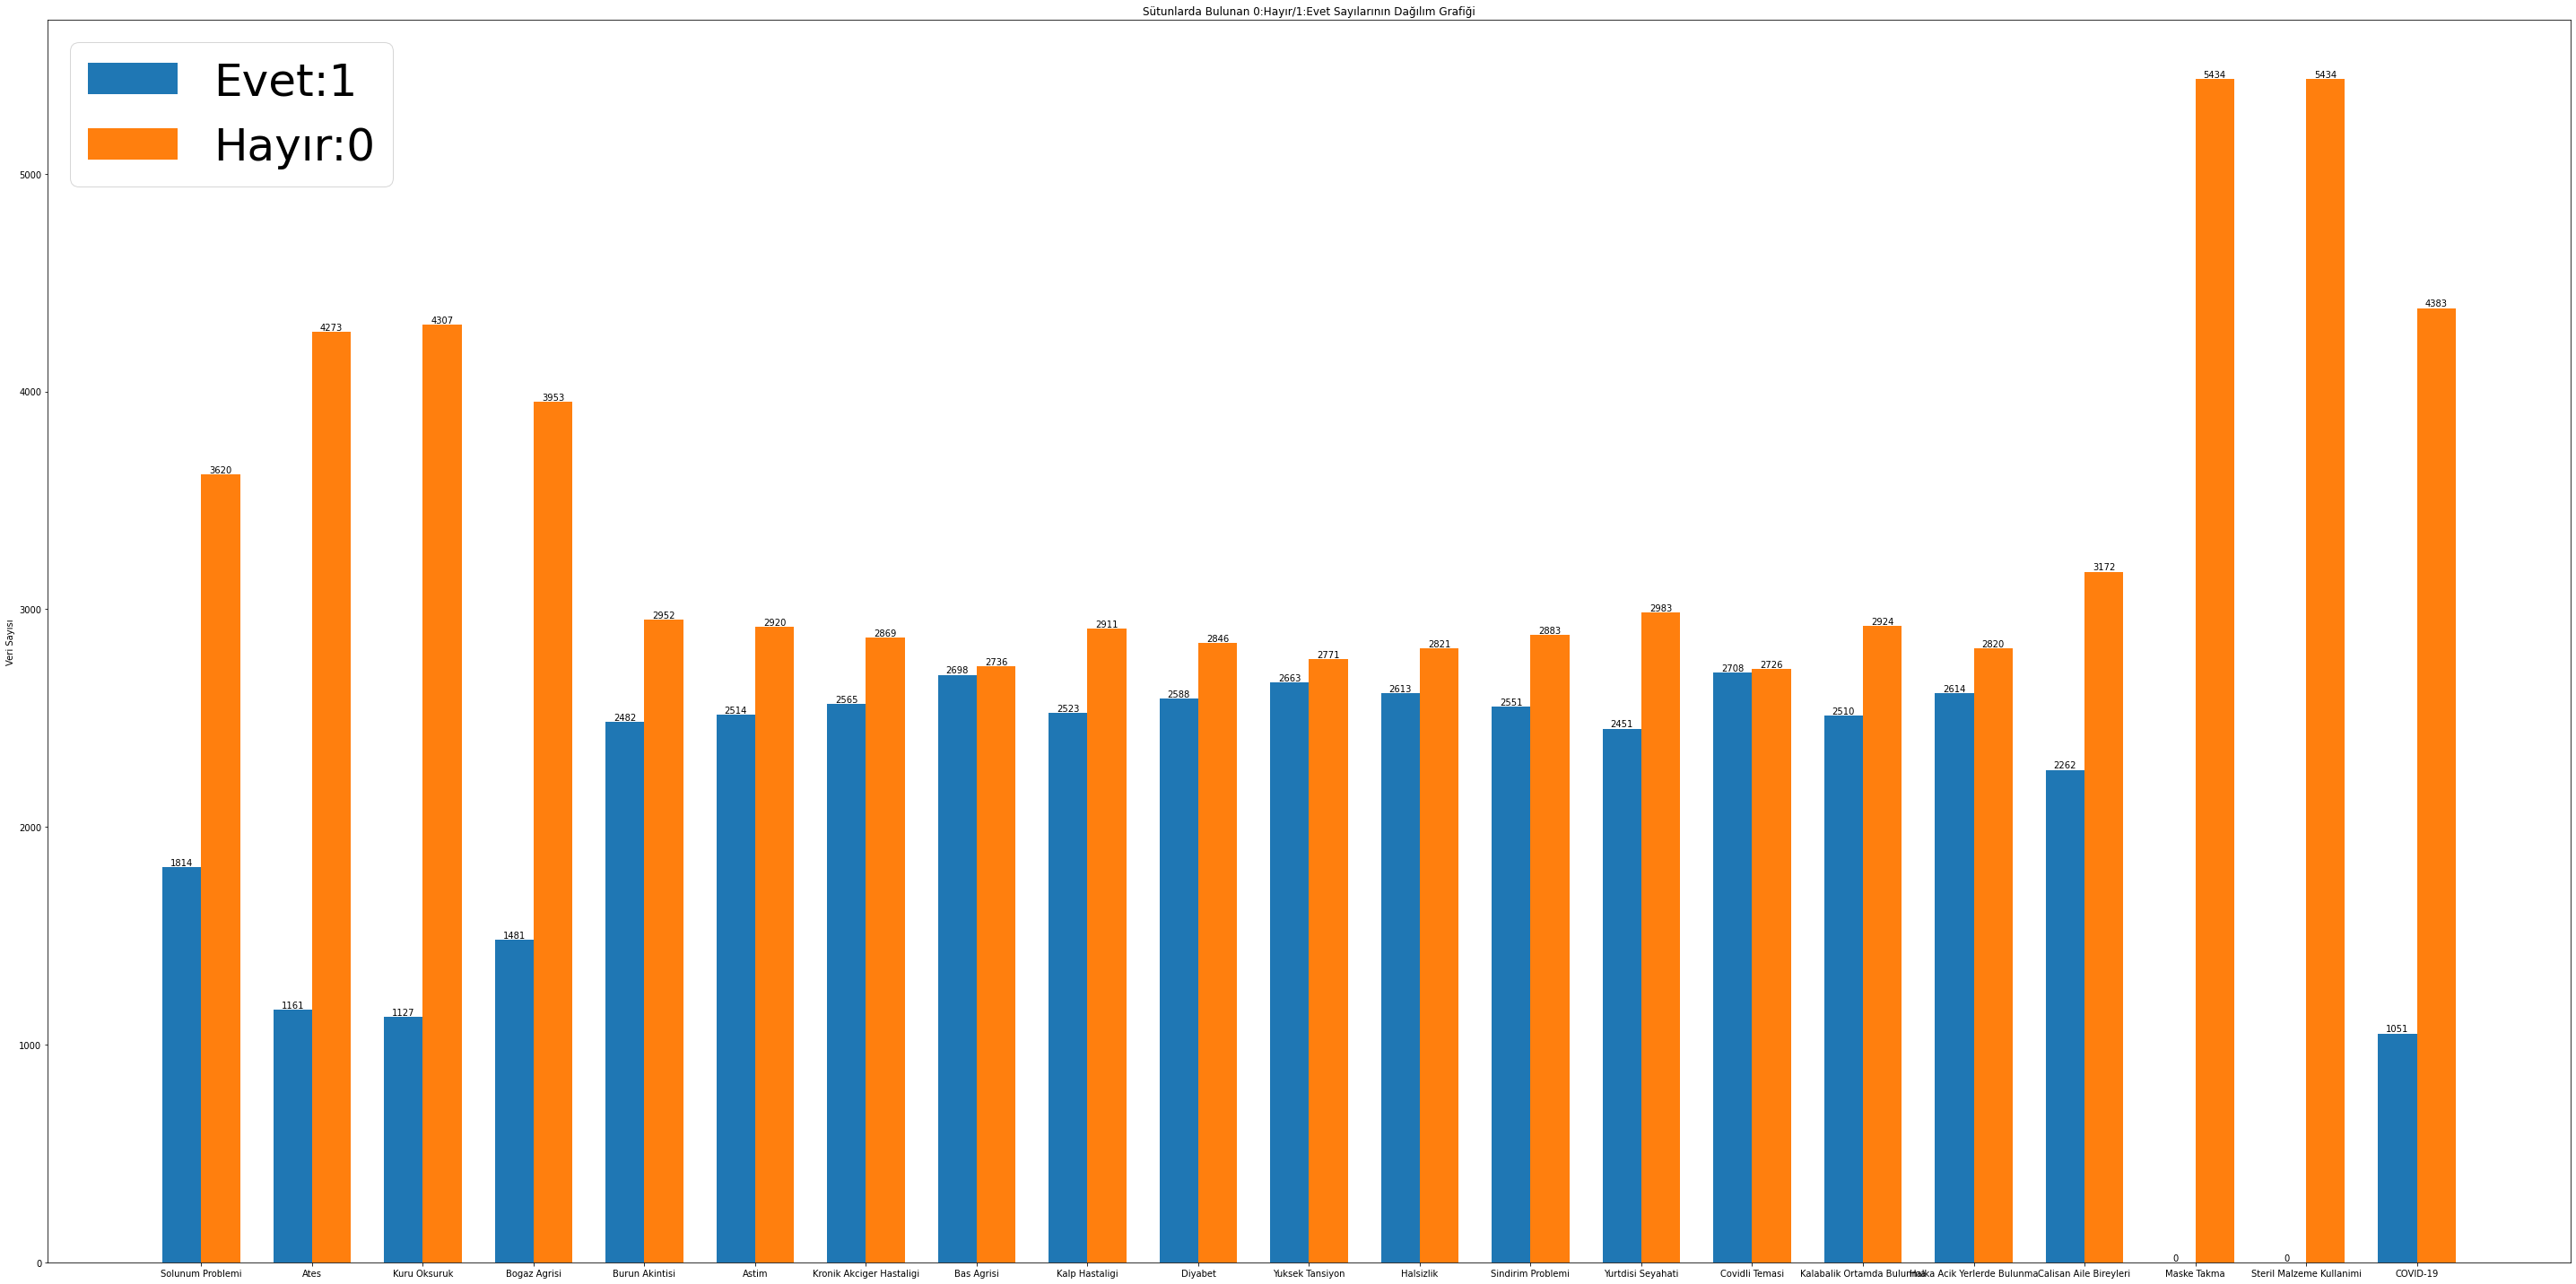

In [9]:
##Sütunların Görselleştirilmesi
#Sütunların ve Sütunlara Ait Değerlerin Listeye Aktarılması
#label,yes ve no değerlerinin aktarılması için boş liste oluşturma
label = []
yes = []
no = []
#kolon isimlerinin for döngüsüyle alınıp 'label' listesine aktarılması
for i in range(0,dataset.shape[1]):
     label.append(dataset.columns[i])
i = 0
#kolonlardaki '0' değerlerinin 'no' listesine aktarılması
while i < dataset.shape[1]:
  no.append(dataset[label[i]].value_counts()[0])  
  i+=1
l = 0
#kolonlardaki '1' değerlerinin 'yes' listesine aktarılması
while l < 18:
  yes.append(dataset[label[l]].value_counts()[1])
  l+=1
yes.insert(19, 0)
yes.insert(20, 0)
yes.append(dataset[label[20]].value_counts()[1])
#listelerin ekranda gösterilmesi
print("Öznitelikler: ",label)
print("Evet Sayıları: ",yes)
print("Hayır Sayıları: ",no)

#Grafiğin Çizilmesi
a = np.arange(len(label))  
width = .35  

fig, ax = plt.subplots(figsize=(40, 20))
rects1 = ax.bar(a - width/2,yes, width, label='Evet:1')
rects2 = ax.bar(a + width/2,no,width, label='Hayır:0')


ax.set_ylabel('Veri Sayısı')
ax.set_title('Sütunlarda Bulunan 0:Hayır/1:Evet Sayılarının Dağılım Grafiği')
ax.set_xticks(a)
ax.set_xticklabels(label)
ax.legend(loc=2, prop={'size': 50})


def autolabel(rects):
      for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Makine Öğrenmesi Başlangıç

## Kategorik Verilerin Sayısallaştırılması

In [10]:
dataset.replace({"Evet":1,"Hayir":0},inplace=True)
dataset.head()

,Solunum Problemi,Ates,Kuru Oksuruk,Bogaz Agrisi,Burun Akintisi,Astim,Kronik Akciger Hastaligi,Bas Agrisi,Kalp Hastaligi,Diyabet,...,Halsizlik,Sindirim Problemi,Yurtdisi Seyahati,Covidli Temasi,Kalabalik Ortamda Bulunma,Halka Acik Yerlerde Bulunma,Calisan Aile Bireyleri,Maske Takma,Steril Malzeme Kullanimi,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


## Özniteliklerin Bağımlı ve Bağımsız Değişkenler Olarak Ayrılması 

In [11]:
X = dataset.drop(['COVID-19'],axis=1)
Y = dataset['COVID-19']

In [12]:
X.shape

(5434, 20)

In [13]:
Y.shape

(5434,)

## Verilerin Eğitim ve Test Olarak Ayrılması

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

In [15]:
X_train.shape

(3803, 20)

In [16]:
Y_train.shape

(3803,)

In [17]:
X_test.shape

(1631, 20)

In [18]:
Y_test.shape

(1631,)

## Makine Öğrenmesi Algoritmaların Seçilip Cross-Validation(Çapraz Doğrulama) Yöntemi Kullanılarak En Yüksek Başarımı Veren Algoritmanın Belirlenmesi

In [19]:

models = [
    ('LR',LogisticRegression()),
    ('NB',GaussianNB()),
    ('KNN',KNeighborsClassifier(n_neighbors=3)),
    ('ABC',AdaBoostClassifier()),
    ('BC',BaggingClassifier()),
    ('ETC',ExtraTreesClassifier()),
    ('GBC',GradientBoostingClassifier()),
    ('RFC',RandomForestClassifier()),
    ('DTC',DecisionTreeClassifier()),
    ('SVM',SVC()),
    ('MLP',MLPClassifier(activation='relu',max_iter=200,shuffle=True,random_state=42)),
    ('XGBoost',XGBClassifier(eval_metric='mlogloss',use_label_encoder =False)),
    ('CatBoost',CatBoostClassifier(iterations=10,))
]
names = []
results = []
for name,model in models:
    kfold = KFold(n_splits=10,random_state=42)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    names.append(name)
    results.append(cv_results)
    print("Algoritma: %s / Başarım: %f / Std: %f" % (name,cv_results.mean(),cv_results.std()))

Algoritma: LR / Başarım: 0.970550 / Std: 0.007138
Algoritma: NB / Başarım: 0.745738 / Std: 0.032772
Algoritma: KNN / Başarım: 0.974229 / Std: 0.005500
Algoritma: ABC / Başarım: 0.968185 / Std: 0.008013
Algoritma: BC / Başarım: 0.980276 / Std: 0.007469
Algoritma: ETC / Başarım: 0.980539 / Std: 0.007370
Algoritma: GBC / Başarım: 0.980280 / Std: 0.007462
Algoritma: RFC / Başarım: 0.981328 / Std: 0.007938
Algoritma: DTC / Başarım: 0.980276 / Std: 0.007469
Algoritma: SVM / Başarım: 0.980280 / Std: 0.007825
Algoritma: MLP / Başarım: 0.982118 / Std: 0.007515
Algoritma: XGBoost / Başarım: 0.982381 / Std: 0.007166
Learning rate set to 0.5
0:	learn: 0.2117687	total: 160ms	remaining: 1.44s
1:	learn: 0.1039646	total: 162ms	remaining: 648ms
2:	learn: 0.0736531	total: 164ms	remaining: 382ms
3:	learn: 0.0656548	total: 165ms	remaining: 248ms
4:	learn: 0.0526335	total: 167ms	remaining: 167ms
5:	learn: 0.0451772	total: 169ms	remaining: 113ms
6:	learn: 0.0429695	total: 171ms	remaining: 73.2ms
7:	learn: 0

## En Yüksek Başarımı Veren 2 Algoritmanın Eğitilip Test Edilmesi

### RandomForestClassifier Algoritması

In [20]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

In [21]:
print("Başarım: ",accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
print(classification_report(y_pred,Y_test))
print("ROC-AUC Puanı: ",roc_auc_score(Y_test, y_pred))

Başarım:  0.9822194972409565
[[ 305   18]
 [  11 1297]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       323
           1       0.99      0.99      0.99      1308

    accuracy                           0.98      1631
   macro avg       0.98      0.97      0.97      1631
weighted avg       0.98      0.98      0.98      1631

ROC-AUC Puanı:  0.9757508302449824


<Figure size 720x720 with 0 Axes>

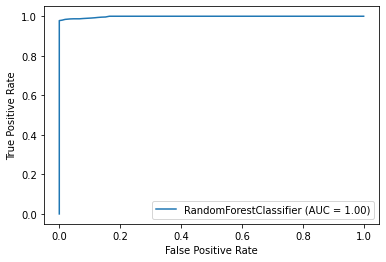

In [22]:
#ROC Eğrisi
plt.figure(figsize=(10,10))
plot_roc_curve(rfc,X_test,Y_test)

### XGBoost Classifier Algoritması

In [23]:
xgb = XGBClassifier(eval_metric='mlogloss',use_label_encoder =False)
xgb.fit(X_train,Y_train)
y_pred = xgb.predict(X_test)

In [24]:
print("Başarım: ",accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
print(classification_report(y_pred,Y_test))
print("ROC-AUC Puanı: ",roc_auc_score(Y_test, y_pred))

Başarım:  0.9822194972409565
[[ 305   18]
 [  11 1297]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       323
           1       0.99      0.99      0.99      1308

    accuracy                           0.98      1631
   macro avg       0.98      0.97      0.97      1631
weighted avg       0.98      0.98      0.98      1631

ROC-AUC Puanı:  0.9757508302449824


<Figure size 720x720 with 0 Axes>

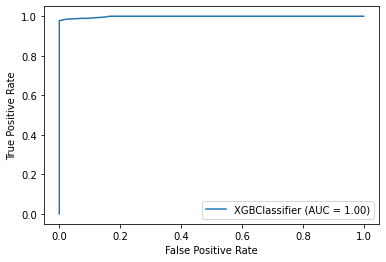

In [25]:
#ROC Eğrisi
plt.figure(figsize=(10,10))
plot_roc_curve(xgb,X_test,Y_test)

## Öznitelik Seçimi(Feature Selection)

### 1)Varyans Eşiği(False:Sıfır varyansa sahip)

In [26]:
v_threshold = VarianceThreshold(threshold = 0 )
v_threshold.fit(X)
v_threshold.get_support() 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False])

### 2)Korelasyon

<AxesSubplot:>

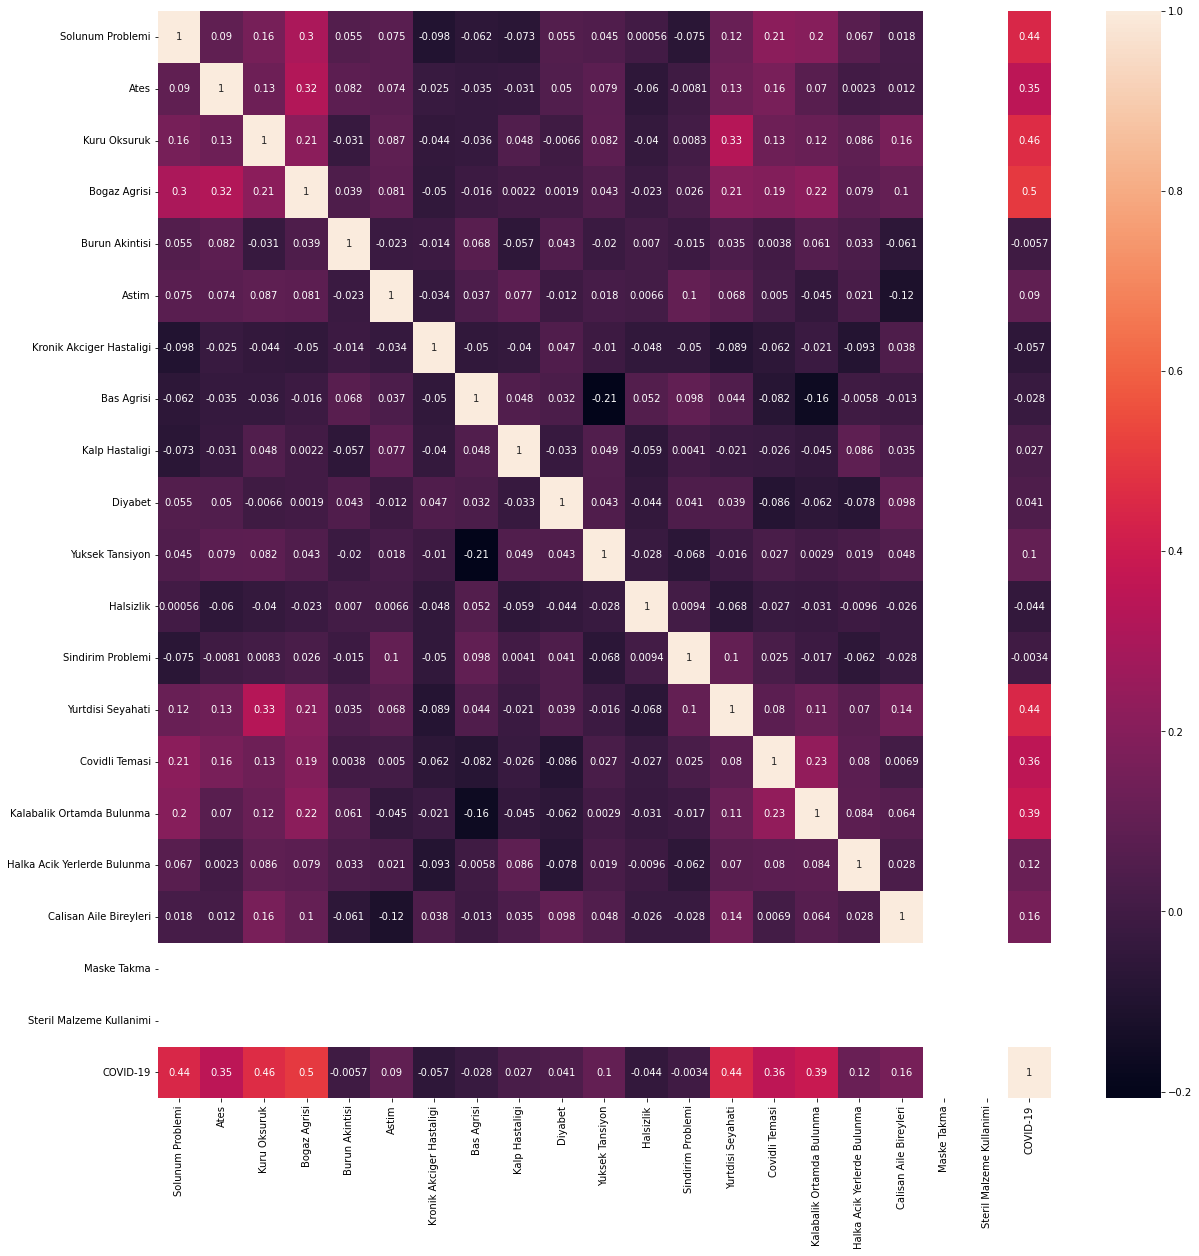

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot=True)

### 3)Information Gain(Bilgi Kazanımı)

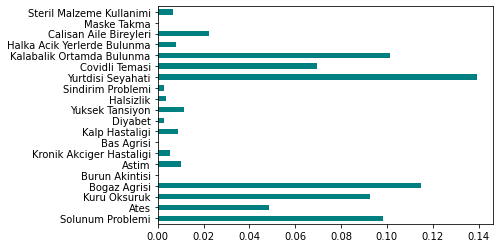

In [28]:
importances = mutual_info_classif(X,Y)
feat_importances = pd.Series(importances,dataset.columns[0:len(dataset.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

## Öznitelik Seçme İşlemi Sonrası Belirlenen Özniteliklerin Veri Setinden Çıkarılıp Yeniden Eğitim ve Test İşlemlerinin Yapılması 

In [29]:
dataset.drop(columns = ["Maske Takma","Steril Malzeme Kullanimi",
                              "Astim","Kronik Akciger Hastaligi","Kalp Hastaligi",
                              "Diyabet","Yuksek Tansiyon"],inplace = True)

In [30]:
dataset.head()

,Solunum Problemi,Ates,Kuru Oksuruk,Bogaz Agrisi,Burun Akintisi,Bas Agrisi,Halsizlik,Sindirim Problemi,Yurtdisi Seyahati,Covidli Temasi,Kalabalik Ortamda Bulunma,Halka Acik Yerlerde Bulunma,Calisan Aile Bireyleri,COVID-19
0,1,1,1,1,1,0,1,1,0,1,0,1,1,1
1,1,1,1,1,0,1,1,0,0,0,1,1,0,1
2,1,1,1,1,1,1,1,1,1,0,0,0,0,1
3,1,1,1,0,0,0,0,0,1,0,1,1,0,1
4,1,1,1,1,1,1,0,1,0,1,0,1,0,1


In [31]:
#Bağımlı ve Bağımsız Değişkenlerin Ayrılması
X = dataset.drop(['COVID-19'],axis=1)
Y = dataset['COVID-19']

In [32]:
#Verilerin Eğitim(Train) ve Test(Test) Olarak Ayrılması
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [33]:
models = [
    ('LR',LogisticRegression()),
    ('NB',GaussianNB()),
    ('KNN',KNeighborsClassifier(n_neighbors=3)),
    ('ABC',AdaBoostClassifier()),
    ('BC',BaggingClassifier()),
    ('ETC',ExtraTreesClassifier()),
    ('GBC',GradientBoostingClassifier()),
    ('RFC',RandomForestClassifier()),
    ('DTC',DecisionTreeClassifier()),
    ('SVM',SVC()),
    ('MLP',MLPClassifier(activation='relu',max_iter=200,shuffle=True,random_state=42)),
    ('XGBoost',XGBClassifier(eval_metric='mlogloss',use_label_encoder =False)),
    ('CatBoost',CatBoostClassifier(iterations=10,))
]
names = []
results = []
for name,model in models:
    kfold = KFold(n_splits=10,random_state=42)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    names.append(name)
    results.append(cv_results)
    print("Algoritma: %s / Başarım: %f / Std: %f" % (name,cv_results.mean(),cv_results.std()))

Algoritma: LR / Başarım: 0.971076 / Std: 0.007058
Algoritma: NB / Başarım: 0.745738 / Std: 0.036715
Algoritma: KNN / Başarım: 0.976597 / Std: 0.007202
Algoritma: ABC / Başarım: 0.966607 / Std: 0.006108
Algoritma: BC / Başarım: 0.980803 / Std: 0.008073
Algoritma: ETC / Başarım: 0.980539 / Std: 0.007370
Algoritma: GBC / Başarım: 0.978177 / Std: 0.007890
Algoritma: RFC / Başarım: 0.981853 / Std: 0.008445
Algoritma: DTC / Başarım: 0.980012 / Std: 0.007648
Algoritma: SVM / Başarım: 0.980804 / Std: 0.007723
Algoritma: MLP / Başarım: 0.980803 / Std: 0.006870
Algoritma: XGBoost / Başarım: 0.982381 / Std: 0.007166
Learning rate set to 0.5
0:	learn: 0.3965105	total: 1.23ms	remaining: 11.1ms
1:	learn: 0.2613835	total: 2.49ms	remaining: 9.96ms
2:	learn: 0.1896985	total: 3.79ms	remaining: 8.86ms
3:	learn: 0.1485176	total: 5.06ms	remaining: 7.59ms
4:	learn: 0.1233343	total: 6.3ms	remaining: 6.3ms
5:	learn: 0.1030146	total: 7.57ms	remaining: 5.04ms
6:	learn: 0.0912807	total: 8.76ms	remaining: 3.75ms


## Öznitelik Seçimi Sonrası En Yüksek Başarımı Veren 2 Algoritmanın Eğitilip Test Edilmesi

### RandomForestClassifier Algoritması

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

In [35]:
print("Başarım: ",accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
print(classification_report(y_pred,Y_test))
print("ROC-AUC Puanı: ",roc_auc_score(Y_test, y_pred))

Başarım:  0.9822194972409565
[[ 305   18]
 [  11 1297]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       323
           1       0.99      0.99      0.99      1308

    accuracy                           0.98      1631
   macro avg       0.98      0.97      0.97      1631
weighted avg       0.98      0.98      0.98      1631

ROC-AUC Puanı:  0.9757508302449824


<Figure size 720x720 with 0 Axes>

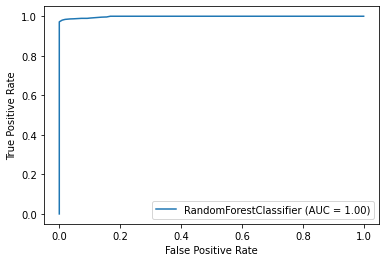

In [36]:
#ROC Eğrisi
plt.figure(figsize=(10,10))
plot_roc_curve(rfc,X_test,Y_test)

### XGBoost Classifier Algoritması

In [37]:
xgb = XGBClassifier(eval_metric='mlogloss',use_label_encoder =False)
xgb.fit(X_train,Y_train)
y_pred = xgb.predict(X_test)

In [38]:
print("Başarım: ",accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
print(classification_report(y_pred,Y_test))
print("ROC-AUC Puanı: ",roc_auc_score(Y_test, y_pred))

Başarım:  0.9822194972409565
[[ 305   18]
 [  11 1297]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       323
           1       0.99      0.99      0.99      1308

    accuracy                           0.98      1631
   macro avg       0.98      0.97      0.97      1631
weighted avg       0.98      0.98      0.98      1631

ROC-AUC Puanı:  0.9757508302449824


<Figure size 720x720 with 0 Axes>

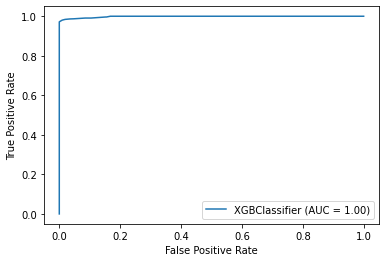

In [39]:
#ROC Eğrisi
plt.figure(figsize=(10,10))
plot_roc_curve(xgb,X_test,Y_test)

# Veri Seti ve Modelin Kaydedilmesi 

In [40]:
#Veri Setinin Kaydedilmesi
dataset.to_csv("new_COVID-19_Dataset.csv",index=False)

#Modelin Kaydedilmesi
joblib.dump(rfc,'model/rfc_model.pkl')

['model/rfc_model.pkl']

# Modelin Projeye Dahil Edilip Test Edilmesi

In [41]:
#Modelin Yüklenmesi(SVM)
rfc_model = open("model/rfc_model.pkl","rb")
model = joblib.load(rfc_model)

#Modelin Test Edilmesi 1
symptom_list = [1,1,1,0,0,0,0,0,0,0,0,0,0] #Toplam 13 Adet Girdi Olduğundan 1 ve 0'lardan oluşan 13 elemanlı bir liste verdik.(1:Var/0:Yok)
if(model.predict([symptom_list]) == 1):
  print("COVID-19 TEST SONUCUNUZ:Evet")
else:
  print("COVID-19 TEST SONUCUNUZ:Hayır")

COVID-19 TEST SONUCUNUZ:Hayır


In [42]:
#Modelin Test Edilmesi 2
symptom_list = [0,1,0,0,1,0,0,1,1,0,1,1,1] #Toplam 13 Adet Girdi Olduğundan 1 ve 0'lardan oluşan 13 elemanlı bir liste verdik.(1:Var/0:Yok)
if(model.predict([symptom_list ]) == 1):
  print("COVID-19 TEST SONUCUNUZ:Evet")
else:
  print("COVID-19 TEST SONUCUNUZ:Hayır")

COVID-19 TEST SONUCUNUZ:Evet


# Makine Öğrenmesi Sonu